In [1]:
from FUNCTIONS import *
%matplotlib inline

import sklearn.discriminant_analysis
random.seed(42)

TensorFlow Version:  2.1.0


Total Events: 4000
Total Labels: 4000

Shape:  (4000, 1600)

Train:  (2788, 1600) (2788,)
Val:  (612, 1600) (612,)
Test:  (600, 1600) (600,)
 


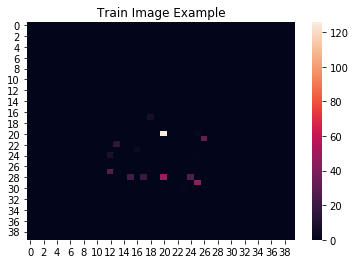

In [2]:
# MAIN
data_s = np.array(pd.read_csv('data/data_s_180k').iloc[:, 1:])
data_b = np.array(pd.read_csv('data/data_b_180k').iloc[:, 1:])

# Slice & Save
events_no = int(1e5)
events_no = 2000
data_s = data_s[0:events_no*40, 0:40]
data_b = data_b[0:events_no*40, 0:40]

# # Save Datasets
# pd.DataFrame(data_s).to_csv('data_s_1000')
# pd.DataFrame(data_b).to_csv('data_b_1000')

train_examples, train_labels, val_examples, val_labels, test_examples, test_labels = preprocess_ML_sklearn(data_s, data_b)




In [3]:

random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
svm = SVC(random_state=42)
KNN = sklearn.neighbors.KNeighborsClassifier()
naive_bayes = MultinomialNB()
BDT = sklearn.ensemble.GradientBoostingClassifier()
bagging = BaggingClassifier(random_state=42, n_jobs=-1)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import time


# Naive Bayes
alpha = [12]





# Hyperparameters
naive_bayes_parameters = {'alpha': alpha}


# Scoring object using accuracy
scorer = make_scorer(accuracy_score)


clfs_param =[(naive_bayes, naive_bayes_parameters)]

In [16]:
# Create list to store models
models = []
unopt_accuracy = []
accuracies = []

# Perform grid search
for clf, parameter in clfs_param:
    print('\n{}\n'.format(clf.__class__.__name__))
    
    grid_obj = GridSearchCV(clf, parameter, scoring=scorer, n_jobs = 6)
    
    # Perform grid search
    start = time.time()
    grid_fit = grid_obj.fit(train_examples, train_labels)
    end = time.time()
    print('Time to tune: {}s'.format(round(end - start), 2))
    
    # Get best estimator
    best_clf = grid_fit.best_estimator_
    models.append(best_clf)
    
    # Make predictions using the unoptimized and model
    start = time.time()
    predictions = (clf.fit(train_examples, train_labels)).predict(val_examples)
    best_predictions = best_clf.predict(val_examples)
    
    predictions_train = (clf.fit(train_examples, train_labels)).predict(train_examples)
    best_predictions_train = best_clf.predict(train_examples)
    end = time.time()
    print('Time to fit-predict: {}s\n'.format(round(end - start), 2))
    
    # Check hyperparameters
    print('Unoptimised: {}\n'.format(clf.get_params(deep = True)))
    print('Optimised: {}\n'.format(best_clf.get_params(deep = True)))
    
    # Print Results
    print("\nUnoptimised-accuracy-training: {:.4f}".format(accuracy_score(train_labels, predictions_train)))
    print("Optimised-accuracy-training: {:.4f}".format(accuracy_score(train_labels, best_predictions_train)))
    
    print("\nUnoptimised-accuracy-validation: {:.4f}".format(accuracy_score(val_labels, predictions)))
    print("Optimised-accuracy-validation: {:.4f}".format(accuracy_score(val_labels, best_predictions)))
    
    print('\n\n=============================================================================================')
    
    unopt_accuracy.append(accuracy_score(val_labels, predictions))
    accuracies.append(accuracy_score(val_labels, best_predictions))
    
print('All unoptimised f1 (validation): {}'.format(unopt_f1))
print('Best unoptimised f1 (validation): {}\n'.format(max(unopt_f1)))
print('All optimised f1 (validation): {}'.format(f1))
print('Best optimised f1 (validation): {}'.format(max(f1)))


MultinomialNB

Time to tune: 1s


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Time to fit-predict: 2s

Unoptimised: {'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

Optimised: {'alpha': 12, 'class_prior': None, 'fit_prior': True}


Unoptimised-accuracy-training: 0.7844
Optimised-accuracy-training: 0.7697

Unoptimised-accuracy-validation: 0.7075
Optimised-accuracy-validation: 0.7222


Traceback (most recent call last):
  File "C:\Users\johng\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-58205b3194a5>", line 48, in <module>
    print('All unoptimised f1 (validation): {}'.format(unopt_f1))
NameError: name 'unopt_f1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\johng\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_rende

NameError: name 'unopt_f1' is not defined

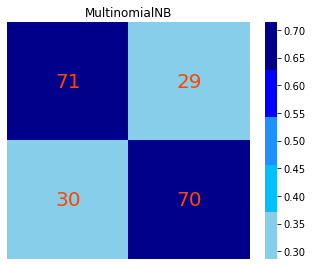

In [19]:
cmx_sklearn(models, test_examples, test_labels, dim=4)